In [166]:
% matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [167]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [168]:
mnist.test.cls = np.array([label.argmax() for label in mnist.test.labels])

In [169]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_classes = 10

In [170]:
def plot_images(images, cls_true, cls_pred=None):
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            xlabel = 'TC : ' + str(cls_true[i])
        else:
            xlabel = 'TC : ' + str(cls_true[i])+'; Pred '+str(cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

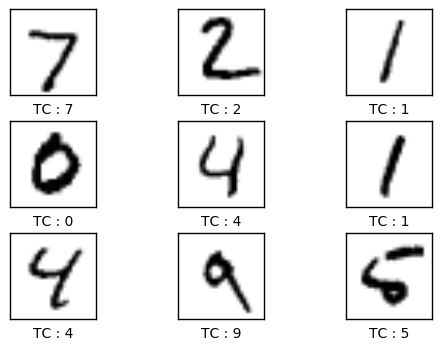

In [171]:
sample_images = mnist.test.images[0:9]
sample_true_cls = mnist.test.cls[0:9]
plot_images(sample_images, sample_true_cls, None)

In [172]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
#y_true_cls = tf.placeholder(tf.int64, [None])

In [173]:
nodes_hl1 = 500
nodes_hl2 = 450
nodes_hl3 = 300
batch_size = 100

In [174]:
def neural_network(dt):
    hl1 = {'weights' : tf.Variable(tf.random_normal([img_size_flat, nodes_hl1])),
          'biases' : tf.Variable(tf.random_normal([nodes_hl1]))}
    
    hl2 = {'weights' : tf.Variable(tf.random_normal([nodes_hl1, nodes_hl2])),
          'biases' : tf.Variable(tf.random_normal([nodes_hl2]))}
    
    hl3 = {'weights' : tf.Variable(tf.random_normal([nodes_hl2, nodes_hl3])),
          'biases' : tf.Variable(tf.random_normal([nodes_hl3]))}
    
    outl = {'weights' : tf.Variable(tf.random_normal([nodes_hl3, num_classes])),
          'biases' : tf.Variable(tf.random_normal([num_classes]))}
    
    res_l1 = tf.add(tf.matmul(dt, hl1['weights']), hl1['biases'])
    res_l1 = tf.nn.relu(res_l1)
    
    res_l2 = tf.add(tf.matmul(res_l1, hl2['weights']), hl2['biases'])
    res_l2 = tf.nn.relu(res_l2)
    
    res_l3 = tf.add(tf.matmul(res_l2, hl3['weights']), hl3['biases'])
    res_l3 = tf.nn.relu(res_l3)
    
    
    res_out = tf.add(tf.matmul(res_l3, outl['weights']), outl['biases'])
    #res_out = tf.nn.relu(res_out)
    return res_out

In [175]:
def train_NN(x, y_true):
    prediction = neural_network(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction, y_true))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    hm_epochs = 30
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y_true: epoch_y})
                epoch_loss += c
            print('Epoch - ', epoch, '; Loss - ', epoch_loss)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_true, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        print('Accuracy ', accuracy.eval({x: mnist.test.images, y_true: mnist.test.labels}))

In [176]:
def train_NN(x, y_true):
    prediction = neural_network(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction, y_true))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    hm_epochs = 30
    sess.run(tf.global_variables_initializer())
    for epoch in range(hm_epochs):
        epoch_loss = 0
        for _ in range(int(mnist.train.num_examples/batch_size)):
            epoch_x, epoch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y_true: epoch_y})
            epoch_loss += c
        print('Epoch - ', epoch, '; Loss - ', epoch_loss)
    correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_true, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels})
    print('Accuracy - ', acc)  
    print()
    print()
    print('Incorrectly classified images')
    class_correct, classification = sess.run([correct, prediction], feed_dict={x: mnist.test.images, y_true:mnist.test.labels})
    classification_true = np.argmax(classification, axis=1)
    class_incorrect = (class_correct == False)
    images_incorrect = mnist.test.images[class_incorrect]
    labels_pred = classification_true[class_incorrect]
    labels_correct = mnist.test.cls[class_incorrect]
    plot_images(images_incorrect[0:9], labels_correct[0:9], labels_pred[0:9])
    

Epoch -  0 ; Loss -  1132383.99379
Epoch -  1 ; Loss -  273012.597908
Epoch -  2 ; Loss -  152017.202425
Epoch -  3 ; Loss -  87999.1305852
Epoch -  4 ; Loss -  53171.6007935
Epoch -  5 ; Loss -  32467.307319
Epoch -  6 ; Loss -  22037.1144331
Epoch -  7 ; Loss -  14908.7243671
Epoch -  8 ; Loss -  13004.5698311
Epoch -  9 ; Loss -  8918.52536727
Epoch -  10 ; Loss -  10194.4067487
Epoch -  11 ; Loss -  9471.28719466
Epoch -  12 ; Loss -  7786.47695162
Epoch -  13 ; Loss -  6861.26799621
Epoch -  14 ; Loss -  6615.94064322
Epoch -  15 ; Loss -  7201.17727474
Epoch -  16 ; Loss -  5962.42609299
Epoch -  17 ; Loss -  5546.71724291
Epoch -  18 ; Loss -  5519.49174499
Epoch -  19 ; Loss -  5577.22289787
Epoch -  20 ; Loss -  5945.65475184
Epoch -  21 ; Loss -  4961.32647444
Epoch -  22 ; Loss -  4565.16852132
Epoch -  23 ; Loss -  3931.91731483
Epoch -  24 ; Loss -  4723.24915138
Epoch -  25 ; Loss -  3627.79933571
Epoch -  26 ; Loss -  4755.63715084
Epoch -  27 ; Loss -  4192.74248276
Epo

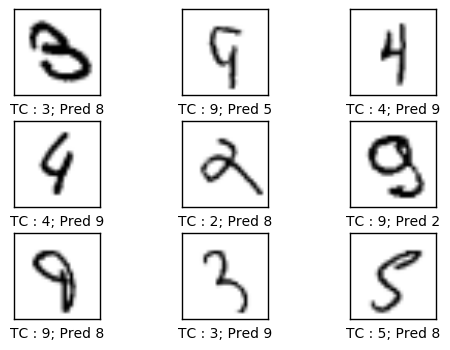

In [177]:
sess = tf.Session()
train_NN(x, y_true)